# Tutorial document for RGB Hexagram (Kondo 2025) with 5-dimensional data

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap

# Read RGB hexagram data and confirm the data

(the data generated in RGB_hexagram_tutorial_for_generation.ipynb is used)

(96, 96)


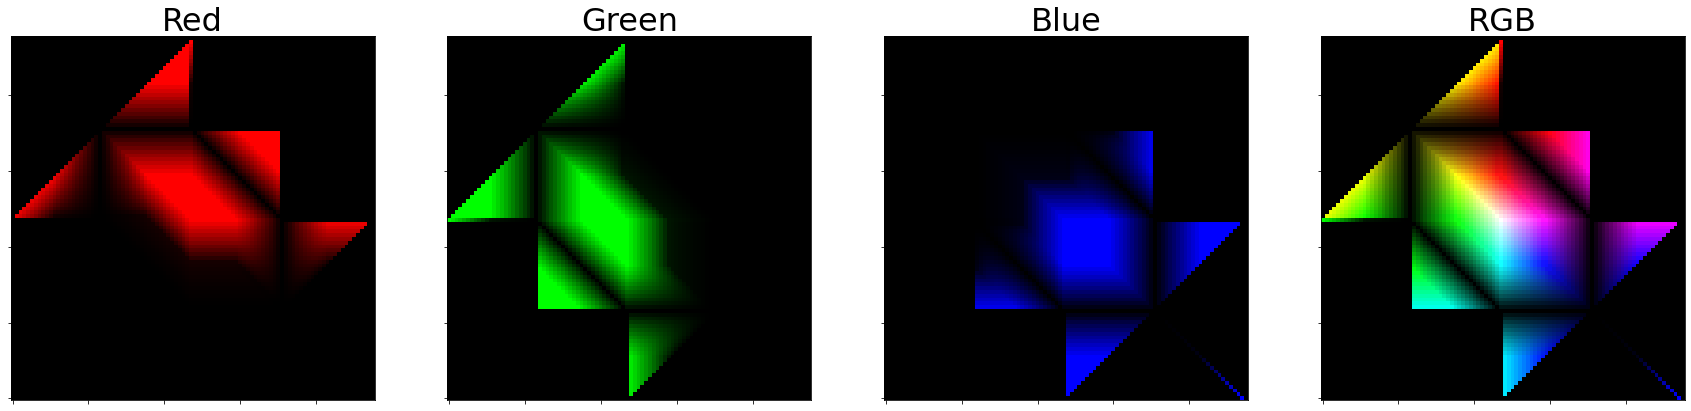

In [2]:
# Read CSV files
r_df = pd.read_csv('rw_hex_test_d.csv', header=None)
g_df = pd.read_csv('gw_hex_test_d.csv', header=None)
b_df = pd.read_csv('bw_hex_test_d.csv', header=None)
n_df = pd.read_csv('nw_hex_test_d.csv', header=None)

# Replace negative values with zero
n_df[n_df < 0] = 0
n_df[n_df > 100] = 0

r_df = r_df.iloc[:, :]
g_df = g_df.iloc[:, :]
b_df = b_df.iloc[:, :]
n_df = n_df.iloc[:, :]

# Normalize RGB values to the range 0~1
r = np.clip(r_df.values, 0, 1)
g = np.clip(g_df.values, 0, 1)
b = np.clip(b_df.values, 0, 1)

# Combine RGB values into a single array
rgb = np.dstack((r, g, b))

# Convert to 1 column
r_series = r_df.stack().reset_index(drop=True)
g_series = g_df.stack().reset_index(drop=True)
b_series = b_df.stack().reset_index(drop=True)

print(r_df.shape)

# Plotting
fig, axs = plt.subplots(1, 4, figsize=(30, 15))
fsiz=32

# Colormap Definition
n_bins = 256  # Colormap fineness
r_colors = [(0, 0, 0), (1, 0, 0)]  # RGB values in the range 0-1
r_cmap_name = 'black_to_red'

g_colors = [(0, 0, 0), (0, 1, 0)]
g_cmap_name = 'black_to_green'

b_colors = [(0, 0, 0), (0, 0, 1)]
b_cmap_name = 'black_to_blue'

# Create color maps
cmr = LinearSegmentedColormap.from_list(r_cmap_name, r_colors, N=n_bins)
cmg = LinearSegmentedColormap.from_list(g_cmap_name, g_colors, N=n_bins)
cmb = LinearSegmentedColormap.from_list(b_cmap_name, b_colors, N=n_bins)

# plotting each data
im1 = axs[0].imshow(r, cmap=cmr, origin='lower')
axs[0].set_title('Red', fontsize=fsiz)
axs[0].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

im2 = axs[1].imshow(g, cmap=cmg, origin='lower')
axs[1].set_title('Green', fontsize=fsiz)
axs[1].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

im3 = axs[2].imshow(b, cmap=cmb, origin='lower')
axs[2].set_title('Blue', fontsize=fsiz)
axs[2].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

im4 = axs[3].imshow(rgb, interpolation='nearest', origin='lower')
axs[3].set_title('RGB', fontsize=fsiz)
axs[3].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

plt.show()

# Creation of sample data for tutorial (5D data)

This 4-dimensional tutorial on RGB hexagrams is demonstrated using 4-dimensional sample data of monthly examination results in 3 subjects and study time.

In [3]:
# Average scores (settable for each subject)
mean_scores = [20, 55, 75, 150]  # 

# Standard deviation
std_dev = 15

# Random seed
np.random.seed(0)

# Number of persons
psn = 100000

# time steps
time_steps = 90

# Generate scores (psn x number of subjects)
# scores = np.random.normal(loc=mean_scores, scale=std_dev, size=(psn, len(mean_scores)))
# Generate scores for each person, each subject, and each hour (psn x number of subjects x number of hours)
scores = np.random.normal(
    loc=np.array(mean_scores).reshape(1, -1, 1),  # 科目ごとの平均を適用
    scale=std_dev,
    size=(psn, len(mean_scores), time_steps)
)

# Round to nearest integer
scores = np.rint(scores)

# Create max score array: default 100, but 200 for subjects with mean 150
max_scores = np.where(np.array(mean_scores) == 150, 200, 100)

# Clipping (to match the shape to each subject)
scores = np.clip(
    scores,
    -1,
    max_scores.reshape(1, -1, 1)  # ブロードキャストのため reshape
    )

# Converted to int type
scores = scores.astype(int)

# Display top 5 rows
print(scores[:,:,:].shape)
print(scores[:5,:,20])

(100000, 4, 90)
[[ -1  83  69 141]
 [ -1  25 100 154]
 [  2  60  56 135]
 [  3  51  74 162]
 [ 46  59  77 135]]


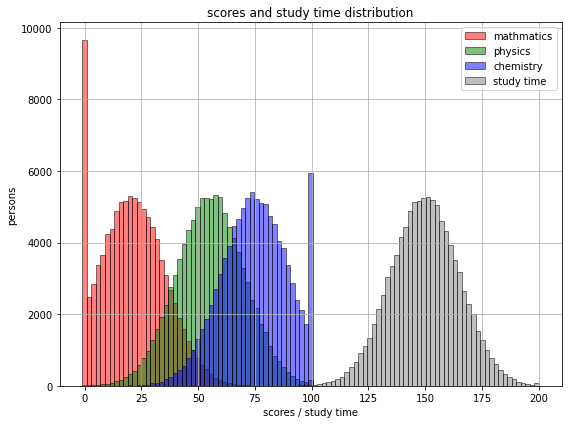

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# Colors and labels for each subject
subjects = ['mathmatics', 'physics', 'chemistry', 'study time']
colors = ['red', 'green', 'blue', 'gray']

plt.figure(figsize=(8, 6))

# Histogram of each subject plotted over one another
for i in range(4):
    plt.hist(scores[:, i,50],
             bins=101,
             range=(-1, 200),
             alpha=0.5,
             color=colors[i],
             label=subjects[i],
             edgecolor='black')

plt.title('scores and study time distribution')
plt.xlabel('scores / study time')
plt.ylabel('persons')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Data normalization

In [5]:
import numpy as np

# Prepare an empty array for normalization (same shape)
normalized_scores = np.zeros_like(scores, dtype=float)

# Normalized (per column) for each subject
for i in range(scores.shape[1]-1):
    max_val = np.max(scores[:, i,:])
    normalized_scores[:, i,:] = (scores[:, i,:] + 1) / (max_val + 1)  # -1点→0, max→1になるよう調整

normalized_scores[:, 3] = scores[:, 3, :]
#normalized_scores[:, 4] = scores[:, 4]
# Display of top 5 rows
print(normalized_scores[:5,:,20])

[[0.00000000e+00 8.31683168e-01 6.93069307e-01 1.41000000e+02]
 [0.00000000e+00 2.57425743e-01 1.00000000e+00 1.54000000e+02]
 [2.97029703e-02 6.03960396e-01 5.64356436e-01 1.35000000e+02]
 [3.96039604e-02 5.14851485e-01 7.42574257e-01 1.62000000e+02]
 [4.65346535e-01 5.94059406e-01 7.72277228e-01 1.35000000e+02]]


Identify the coordinates of the normalized data on the RGB hexagram. <br>
One is added after the coordinates are identified, but the variable to be added is arbitrary.

In [6]:
#initialized position data
vertical_range = np.linspace(50, 200, 151)
pos_data_rgb = np.zeros((r.shape[0], r.shape[1], vertical_range.shape[0], time_steps))

start_time = time.time()

for t_val in range(time_steps):
    print("time_steps:",t_val+1,"/",time_steps)
    if np.mod(t_val,10) == 0:
        step_time = time.time()
        print(f"time: {(step_time-start_time):.2f} sec")
    for i in range(psn):
        tmp_data_rgb = np.zeros((r.shape[0], r.shape[1]))
        tmp_data_r   = np.zeros((r.shape[0], r.shape[1]))+normalized_scores[i,0,t_val]
        tmp_data_g   = np.zeros((r.shape[0], r.shape[1]))+normalized_scores[i,1,t_val]
        tmp_data_b   = np.zeros((r.shape[0], r.shape[1]))+normalized_scores[i,2,t_val]
        
        # Calculate the value of the difference in each coordinate of the RGB hexagram
        tmp_data_rgb = (r-tmp_data_r)**2.0 + (g-tmp_data_g)**2.0 + (b-tmp_data_b)**2.0
        
        # Get the vertical index (coordinates) of the minimum value
        min_index = np.unravel_index(np.argmin(tmp_data_rgb), tmp_data_rgb.shape)
        v_index = np.argmin(np.abs(vertical_range - normalized_scores[i,3,t_val]))
        
        # Add 1 to the corresponding coordinates (in this case, the number of persons, but any variable can be used)
        pos_data_rgb[min_index[0],min_index[1],v_index,t_val] += 1

end_time = time.time()

elapsed_time = end_time - start_time
print(f"elapsed time: {elapsed_time:.2f} sec, data size:",psn)

print(pos_data_rgb.shape)

time_steps: 1 / 90
time: 0.00 sec
time_steps: 2 / 90
time_steps: 3 / 90
time_steps: 4 / 90
time_steps: 5 / 90
time_steps: 6 / 90
time_steps: 7 / 90
time_steps: 8 / 90
time_steps: 9 / 90
time_steps: 10 / 90
time_steps: 11 / 90
time: 78.57 sec
time_steps: 12 / 90
time_steps: 13 / 90
time_steps: 14 / 90
time_steps: 15 / 90
time_steps: 16 / 90
time_steps: 17 / 90
time_steps: 18 / 90
time_steps: 19 / 90
time_steps: 20 / 90
time_steps: 21 / 90
time: 157.65 sec
time_steps: 22 / 90
time_steps: 23 / 90
time_steps: 24 / 90
time_steps: 25 / 90
time_steps: 26 / 90
time_steps: 27 / 90
time_steps: 28 / 90
time_steps: 29 / 90
time_steps: 30 / 90
time_steps: 31 / 90
time: 236.82 sec
time_steps: 32 / 90
time_steps: 33 / 90
time_steps: 34 / 90
time_steps: 35 / 90
time_steps: 36 / 90
time_steps: 37 / 90
time_steps: 38 / 90
time_steps: 39 / 90
time_steps: 40 / 90
time_steps: 41 / 90
time: 316.05 sec
time_steps: 42 / 90
time_steps: 43 / 90
time_steps: 44 / 90
time_steps: 45 / 90
time_steps: 46 / 90
time_st

# Plotting of vertically summed RGB hexagrams over a selected period of time

(96, 96, 151, 90)


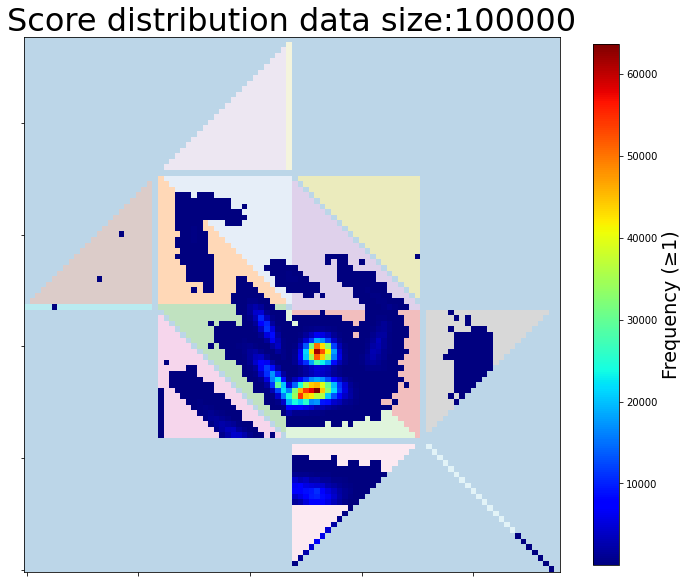

In [7]:
# Mask to plot only areas with a value greater than or equal to 1
masked_data = np.ma.masked_less(pos_data_rgb, 1)
print(masked_data.shape)

# target time steps
s_time = 20 # the start time step
e_time = 50 # the end   time step

# Plot the results and add a color bar
fig, axs = plt.subplots(1, 1, figsize=(12, 12))
fsiz=32
im = axs.imshow(n_df, cmap='tab20', origin='lower',alpha=0.3)
im = axs.imshow(np.sum(masked_data[:,:,:,s_time:e_time],axis=(2,3)), cmap='jet', origin='lower')

# Added color bar
cbar = plt.colorbar(im, ax=axs, shrink=0.8)
cbar.set_label('Frequency (≥1)', fontsize=fsiz * 0.6)

axs.set_title('Score distribution data size:'+str(psn), fontsize=fsiz)
axs.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

# Frequency of study time for each Area in RGB hexagram

Plot data for each Area with study time on the vertical axis and time series on the horizontal axis.

i_area: 1
i_area: 2
i_area: 3
i_area: 4
i_area: 5
i_area: 6
i_area: 7
i_area: 8
i_area: 9
i_area: 10
i_area: 11
i_area: 12
i_area: 13
i_area: 14
i_area: 15


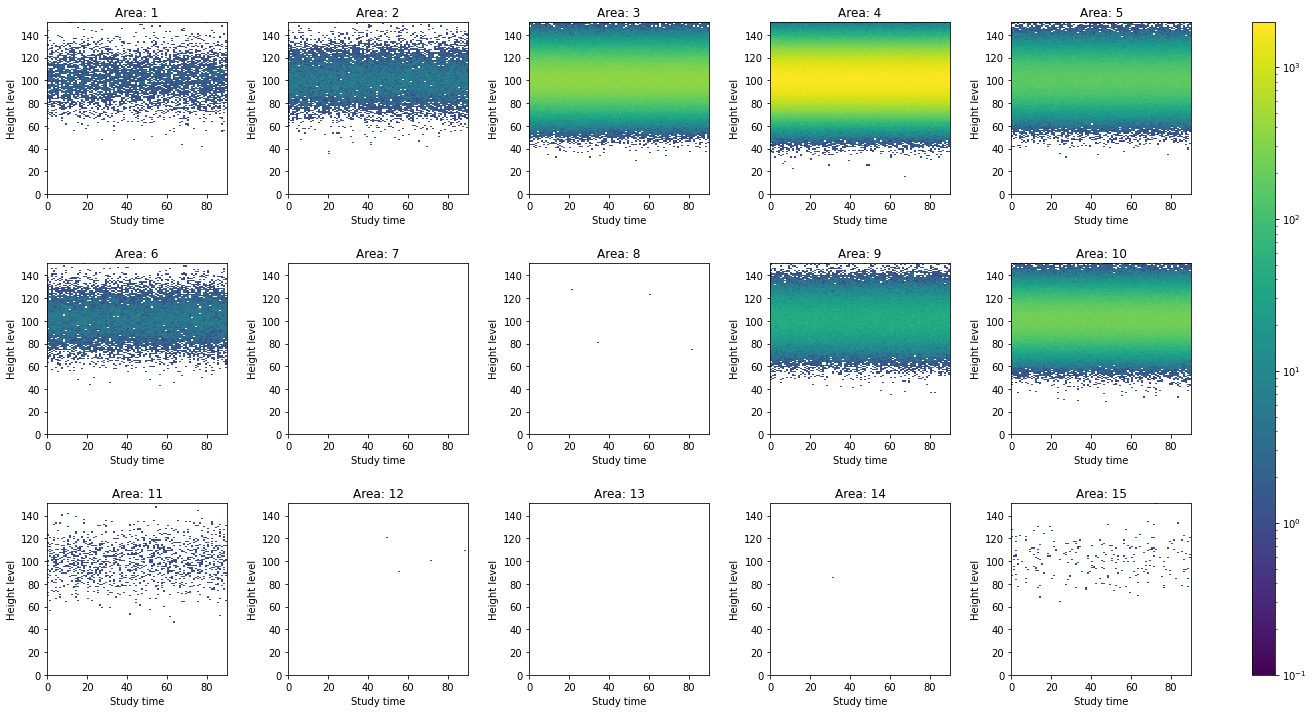

In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm

# Custom colormap (white below 0)
base_cmap = plt.get_cmap('viridis')
cmap = mcolors.ListedColormap(base_cmap(np.linspace(0, 1, 256)))
cmap.set_under('white')  # 'under'はvmin未満の値に適用される

# Create entire figure
fig = plt.figure(figsize=(22, 12))
gs = gridspec.GridSpec(3, 6, width_ratios=[1,1,1,1,1,1/8], wspace=0.4, hspace=0.4)

axes = []
for i in range(15):
    row = i // 5
    col = i % 5
    ax = fig.add_subplot(gs[row, col])
    axes.append(ax)

# Pre-determine the maximum value of data to be used for plotting (make it the overall common scale).
global_max = 0
for i_area in range(15):
    target_mask = (n_df * 256.0 == float(i_area + 1))
    masked_data = pos_data_rgb[target_mask, :, :]
    hist_data = np.sum(masked_data, axis=0)
    current_max = np.max(hist_data)
    if current_max > global_max:
        global_max = current_max

# Plotting on all subplots
for i_area in range(15):
    target_mask = (n_df * 256.0 == float(i_area + 1))
    print("i_area:", i_area + 1)

    masked_data = pos_data_rgb[target_mask, :, :]
    hist_data = np.sum(masked_data, axis=0)

    ax = axes[i_area]
    im = ax.imshow(hist_data, aspect='auto', origin='lower',
                   extent=[0, 90, 0, 151], cmap=cmap, 
                   norm=LogNorm(vmin=0.1, vmax=global_max),interpolation='none')

    ax.set_xlabel('Study time')
    ax.set_ylabel('Height level')
    ax.set_title('Area: ' + str(i_area + 1))
    ax.grid(False)

# Create color bar (placed on the right side)
cbar_ax = fig.add_subplot(gs[:, 5])
fig.colorbar(im, cax=cbar_ax)

plt.show()